In [138]:
import pandas as pd
import numpy as np
import jieba
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt

sentence = "不寒而栗！《他是谁》里曾轰动全国的奸杀案"
seg_list = jieba.cut(sentence, cut_all=False)
print(" ".join(seg_list))  # 分词结果

不寒而栗 ！ 《 他 是 谁 》 里 曾 轰动 全国 的 奸杀 案


In [74]:
wenxuecity = pd.read_excel('wenxuecity track url.xlsx')

In [127]:
wenxuecity = wenxuecity[['Month', 'Scheduled Date', 'Product', 'Content', 'User']]
wenxuecity['Content'] = wenxuecity['Content'].apply(lambda x: " ".join(jieba.cut(x)))
wenxuecity = wenxuecity[wenxuecity['Month'] != 0]
wenxuecity = wenxuecity.fillna(0)

In [128]:
wenxuecity.head(20)

Month       Scheduled Date          Product  \
0   2022/01  2022-01-04 00:00:00  TV + Home Phone   
1   2022/01  2022-01-06 00:00:00            AIjia   
2   2022/01  2022-01-07 00:00:00            Prime   
4   2022/01  2022-01-11 00:00:00  TV + Home Phone   
5   2022/01  2022-01-13 00:00:00            AIjia   
6   2022/01  2022-01-14 00:00:00            Prime   
8   2022/01  2022-01-18 00:00:00            AIjia   
9   2022/01  2022-01-20 00:00:00            Prime   
10  2022/01  2022-01-21 00:00:00  TV + Home Phone   
12  2022/01  2022-01-25 00:00:00            Prime   
13  2022/01  2022-01-27 00:00:00  TV + Home Phone   
14  2022/01  2022-01-28 00:00:00            AIjia   
16  2022/02  2022-02-01 00:00:00            AIjia   
17  2022/02  2022-02-03 00:00:00            Prime   
18  2022/02  2022-02-04 00:00:00  TV + Home Phone   
20  2022/02  2022-02-08 00:00:00       Home Phone   
21  2022/02  2022-02-10 00:00:00            AIjia   
22  2022/02  2022-02-11 00:00:00            Prime   
24  2022/02  2022-02-15 00:00:00            AIjia   
25  2022/02  2022-02-17 00:00:00            Prime   

                                              Content   User  
0   华语                                            ...    0.0  
1   居家                                            ...    0.0  
2   中美双                                           ...    0.0  
4   新                                             ...  306.0  
5   比                                             ...    0.0  
6   中美双                                           ...    0.0  
8   监控                                            ...  289.0  
9   只要                                            ...    0.0  
10  中文                                            ...    0.0  
12  找到                                            ...  705.0  
13  春晚                                            ...  309.0  
14  双语                                            ...    0.0  
16  老人                                            ...  419.0  
17  跨国                                            ...    0.0  
18  开端                                            ...  462.0  
20  手机                                            ...  799.0  
21  华人                                            ...    0.0  
22  海外                                            ...    3.0  
24  元宵节                                           ...    0.0  
25  这个                                            ...    3.0

In [111]:
wenxuecity.shape

(174, 5)

In [126]:
clicks_by_product_wxc = wenxuecity.groupby('Product').agg({'User': ['sum', 'count', 'mean']})
clicks_by_product_wxc['User', 'mean'] = clicks_by_product_wxc['User', 'mean'].round(2)
clicks_by_product_wxc_result = clicks_by_product_wxc.reset_index()

clicks_by_product_wxc_result.columns = ['Product', 'Total Users', 'Count', 'Average Users']

clicks_by_product_wxc_result.to_excel('clicks_by_product_result.xlsx', index=False)


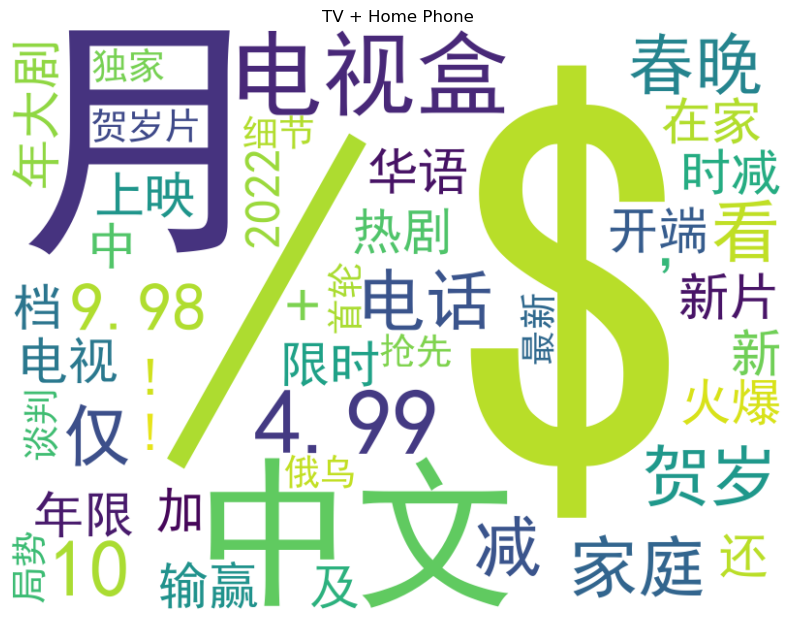

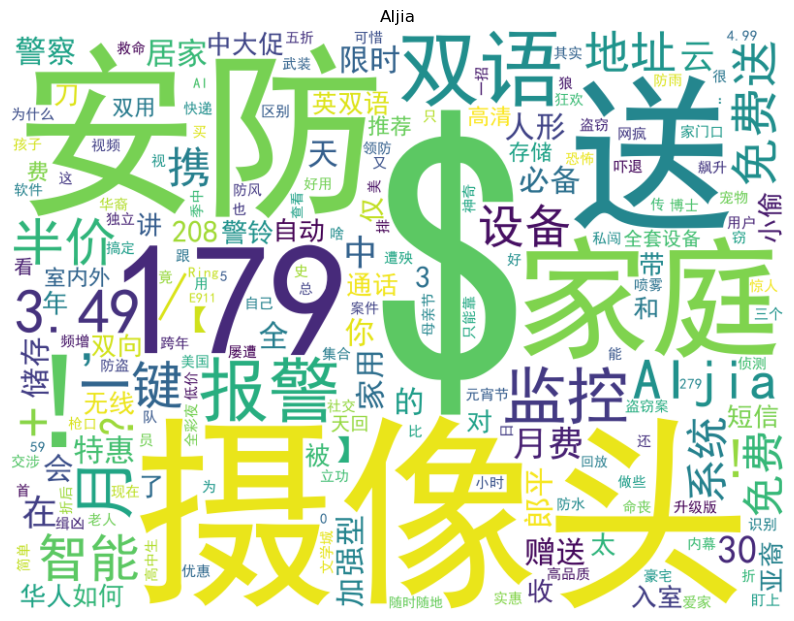

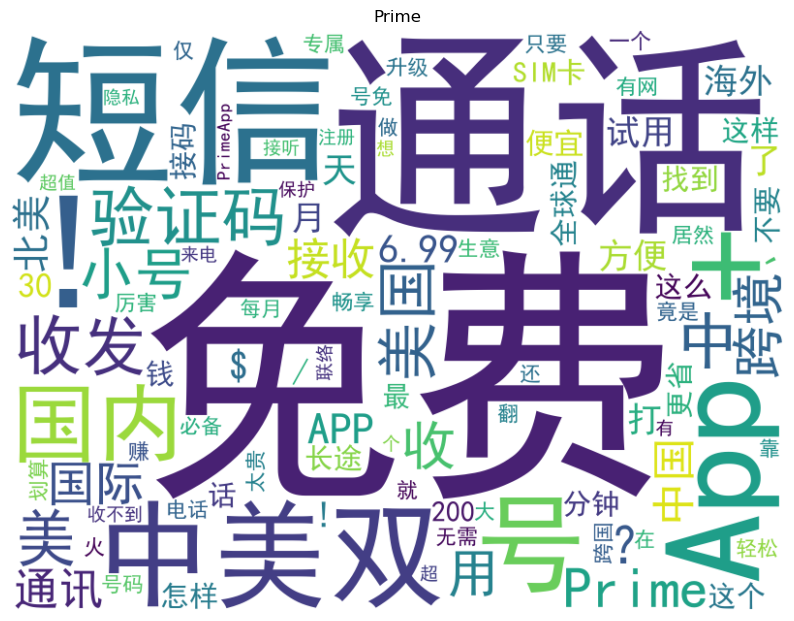

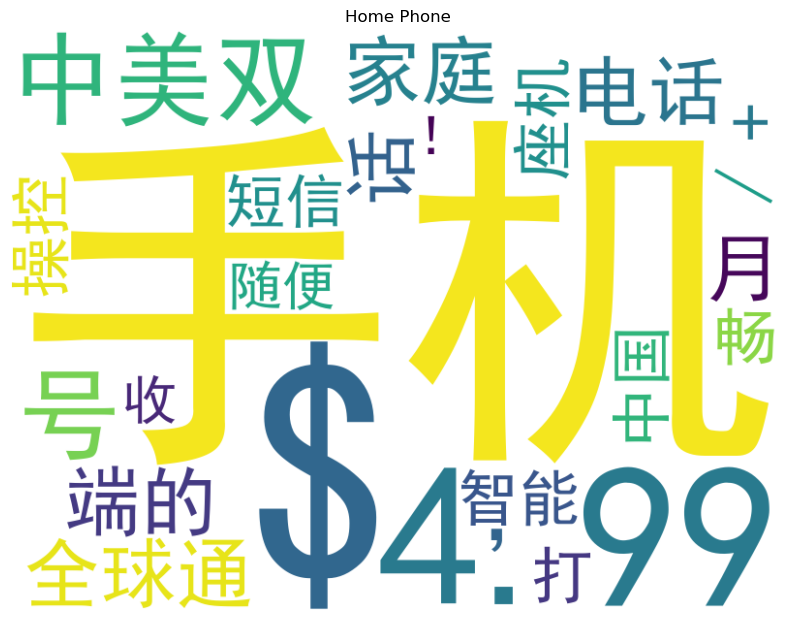

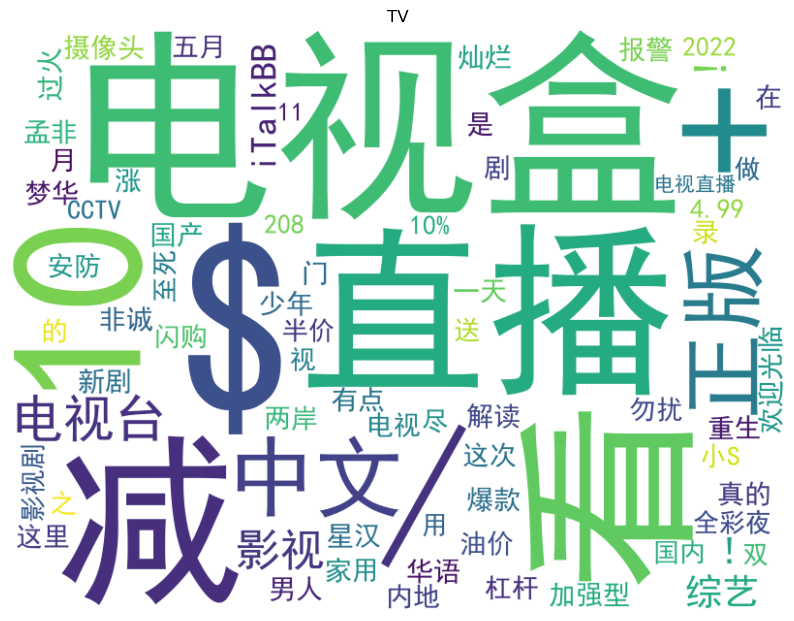

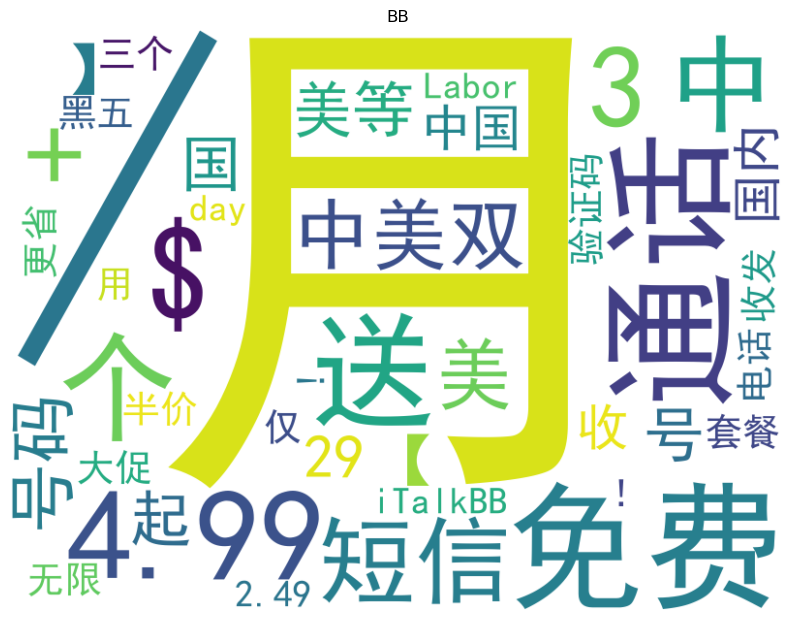

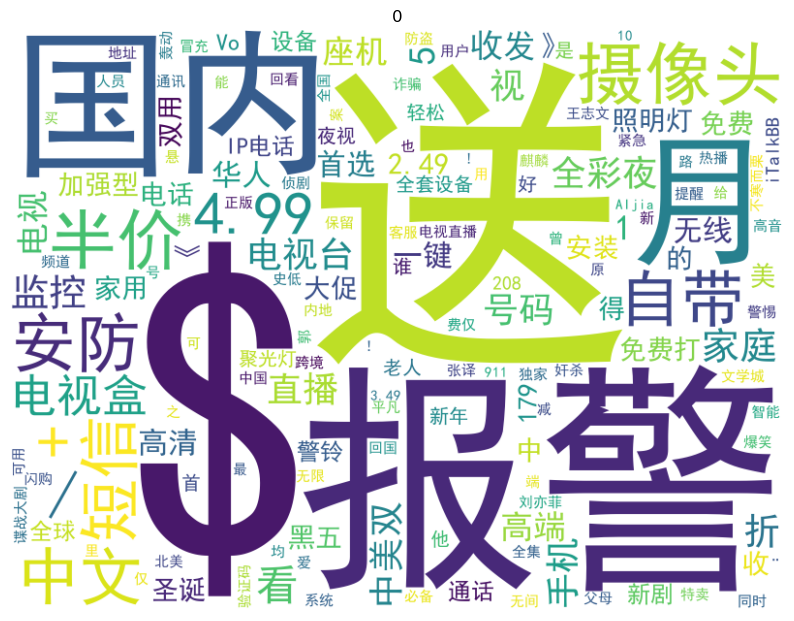

In [134]:
#点击率与词正比关联
import matplotlib.pyplot as plt
from wordcloud import WordCloud

product_texts = {}
word_frequencies = {}

for produwenxuecity = wenxuecity.fillna('')

# 创建字典存储产品的文本和词频
product_texts = {}
word_frequencies = {}

# 遍历每个产品
for product in wenxuecity['Product'].unique():
    # 提取该产品的所有内容
    product_text = ' '.join(wenxuecity[wenxuecity['Product'] == product]['Content'])
    product_texts[product] = product_text
    
    # 统计词频
    words = product_text.split()
    word_counts = {}
    for word in words:
        if word in word_counts:
            word_counts[word] += 1
        else:
            word_counts[word] = 1
    
    word_frequencies[product] = word_counts
    
    # 计算每个词的点击数量
    word_clicks = {}
    for word in word_counts:
        escaped_word = re.escape(word)
        clicks = wenxuecity[(wenxuecity['Product'] == product) & (wenxuecity['Content'].str.contains(escaped_word))]['User'].sum()
        clicks = 0 if pd.isnull(clicks) else clicks
        word_clicks[word] = clicks

    # 创建词云
    wordcloud = WordCloud(background_color='white', width=800, height=600)
    # 将点击数量与词频反比关联
    wordcloud.generate_from_frequencies({word: 1 / word_clicks[word] for word in word_clicks})
    
    # 调整词云中词的大小
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(product)
    plt.axis('off')
    plt.show()ct in wenxuecity['Product'].unique():
    product_text = ' '.join(wenxuecity[wenxuecity['Product'] == product]['Content'])
    product_texts[product] = product_text
    
    # 统计词频
    words = product_text.split()
    word_counts = {}
    for word in words:
        if word in word_counts:
            word_counts[word] += 1
        else:
            word_counts[word] = 1
    
    word_frequencies[product] = word_counts
    
    # 创建词云
    wordcloud = WordCloud(background_color='white', font_path='simhei.ttf', width=800, height=600)
    wordcloud.generate_from_frequencies(word_counts)
    
    # 调整词云中词的大小
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(product)
    plt.axis('off')
    plt.show()

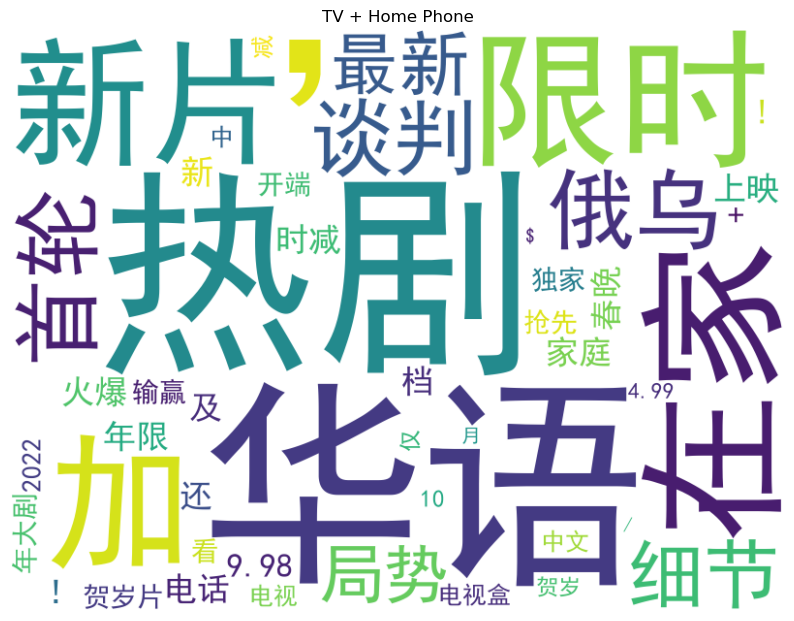

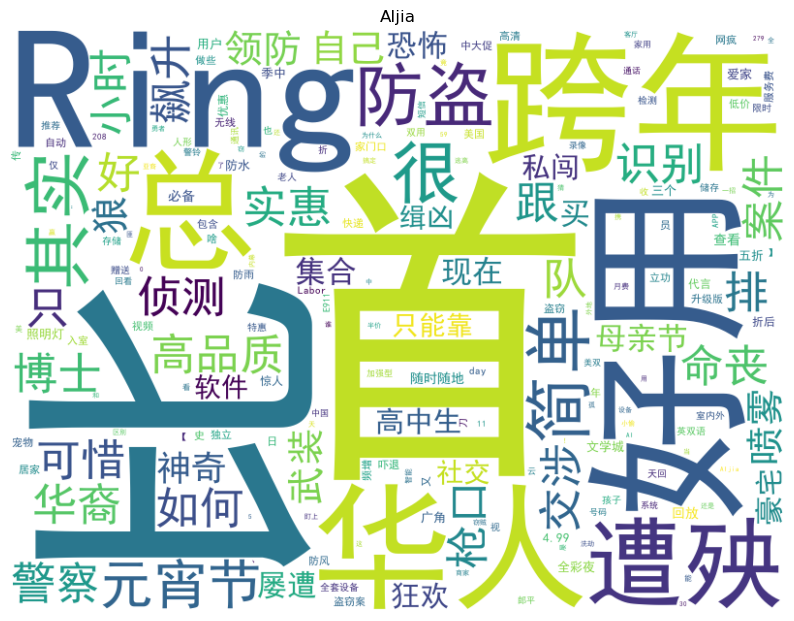

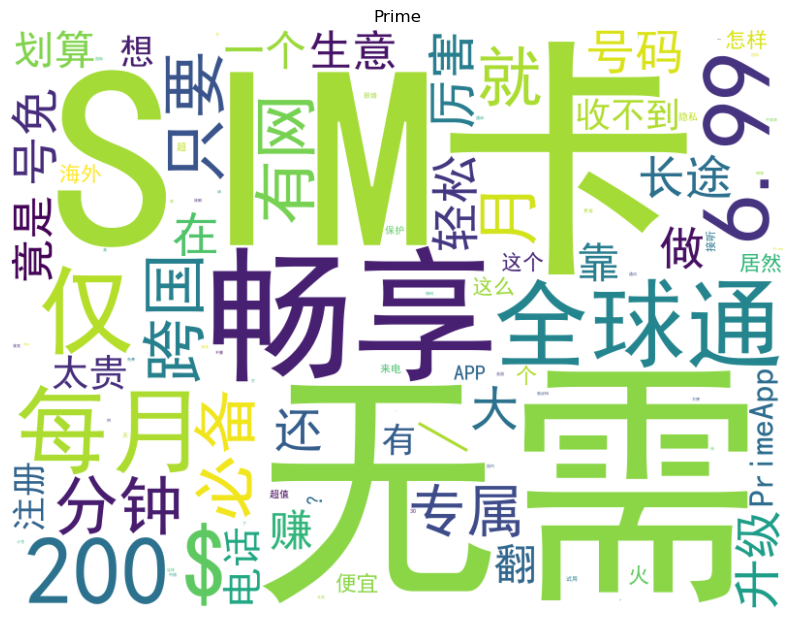

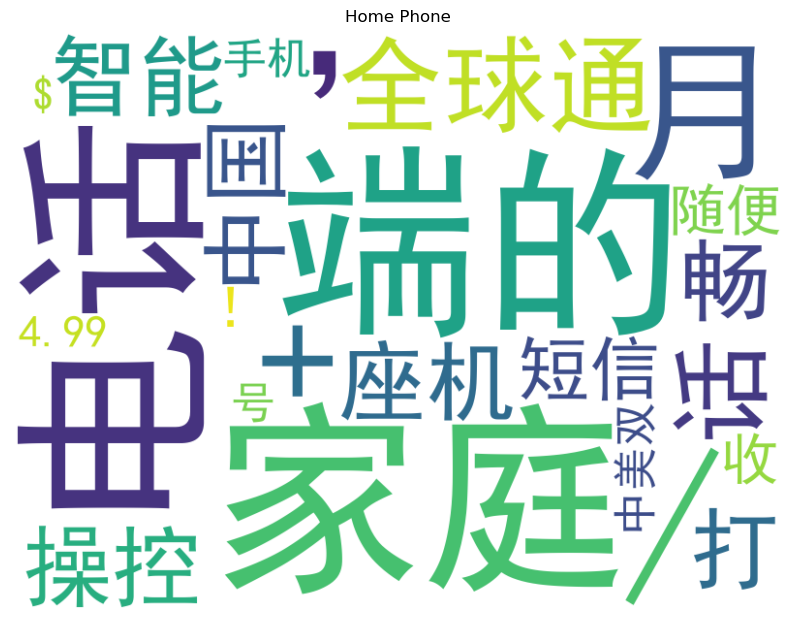

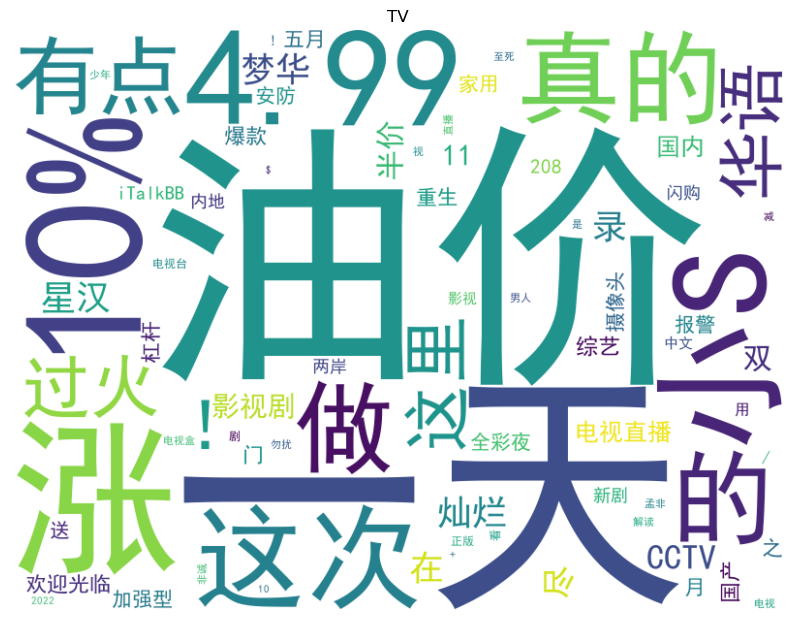

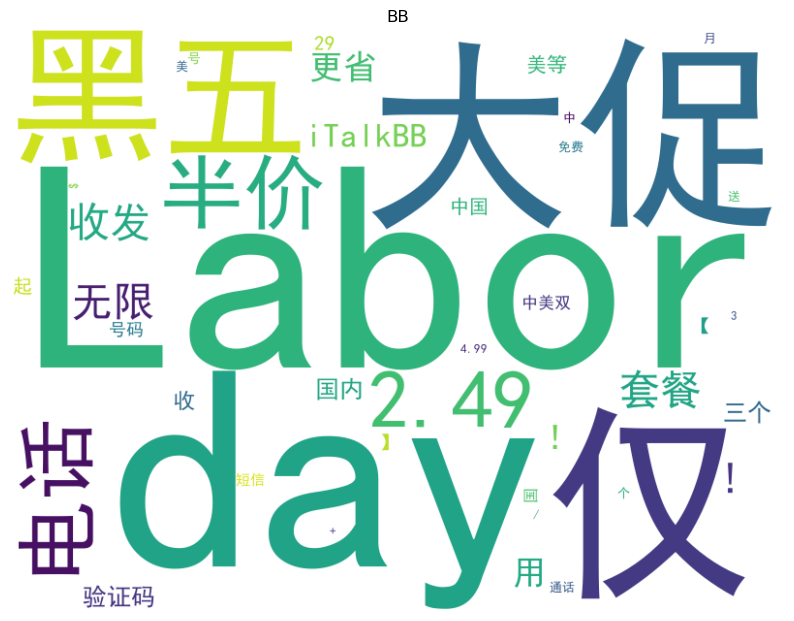

In [148]:
#点击率与词反比关联
for product in wenxuecity['Product'].unique():
    if product == 0:
        continue
    
    product_text = ' '.join(wenxuecity[wenxuecity['Product'] == product]['Content'])
    product_texts[product] = product_text

    # 统计词频
    words = product_text.split()
    word_counts = {}
    for word in words:
        if word in word_counts:
            word_counts[word] += 1
        else:
            word_counts[word] = 1

    word_frequencies[product] = word_counts

    # 计算每个词的点击数量
    word_clicks = {}
    for word in word_counts:
        escaped_word = re.escape(word)
        clicks = wenxuecity[(wenxuecity['Product'] == product) & (wenxuecity['Content'].str.contains(escaped_word))]['User'].sum()
        clicks = 0 if pd.isnull(clicks) else int(clicks)  # 将NaN替换为0，并将点击数量转为整数
        word_clicks[word] = clicks

    # 创建词云
    wordcloud = WordCloud(background_color='white', font_path='simhei.ttf', width=800, height=600)
    
    # 处理点击数量为0的情况
    if all(clicks == 0 for clicks in word_clicks.values()):
        continue
    
    # 计算词频的权重（点击数量的倒数）
    frequencies = {word: 1 / (clicks + 1) for word, clicks in word_clicks.items()}
    
    wordcloud.generate_from_frequencies(frequencies)
    
    # 调整词云中词的大小
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(product)
    plt.axis('off')
    plt.show()

In [61]:
#LA 的
la = pd.read_excel('la track url.xlsx')

In [72]:
la.head(20)

Month    日期                                            content  Users
0     5.0   5/4                         为什么 华人 易 被 小偷 盯上 ？ 一招 搞定 ！    6.0
1     5.0   5/5             找到 了 ！ 这样 打 中国 不要 钱 、 接收 国内 验证码 最 方便 ！  297.0
2     5.0   5/6                     无线 + AI 人形 侦测   限时 送 $ 179 摄像头    0.0
3     5.0   5/6                      终于 找到 了 ！ 接收 国内 验证码 最 简单 的 方法    0.0
4     5.0   5/7                      终于 找到 了 ！ 接收 国内 验证码 最 简单 的 方法    3.0
5     5.0   5/8                      终于 找到 了 ！ 接收 国内 验证码 最 简单 的 方法    0.0
6     5.0   5/9                      终于 找到 了 ！ 接收 国内 验证码 最 简单 的 方法  615.0
7     5.0  5/10               $ 6.99 / 月   免费 接码 + 跨境 电话   30 天 试用  382.0
8     5.0  5/11                        双语 系统 居家 安防   限时 送 $ 179 设备  807.0
9     5.0  5/12                        双语 系统 居家 安防   限时 送 $ 179 设备    0.0
10    5.0  5/13                        双语 系统 居家 安防   限时 送 $ 179 设备    0.0
11    5.0  5/14                        双语 系统 居家 安防   限时 送 $ 179 设备    0.0
12    5.0  5/15                        双语 系统 居家 安防   限时 送 $ 179 设备    0.0
13    5.0  5/16                  仅 $ 6.99 得 中美双 号码   免费 国际 长途 + 短信  343.0
14    5.0  5/17              30 天 试用   中 美 通讯 App   免费 中 美 短信 + 通话  561.0
15    5.0  5/18              五折 开抢 !   送 $ 179 摄像头   智能 监控   全彩夜 视  130.0
16    5.0  5/19      智能 双语 监控 5 折来 了 !   仅 $ 3.49 / 月   携 地址 报警 \n    0.0
17    5.0  5/20  史低 5 折 $ 3.49 / 月 !   AIjia 智能 双语 监控 限时 送 $ 17...  218.0
18    5.0  5/23               双语 家庭 监控 限时 5 折 !   $ 3.49 / 月 送 摄像头  394.0
19    5.0  5/24                    家庭 监控 年 中大 促月费 半价 + 送 $ 179 摄像头  326.0

In [68]:
la = la[['Month', '日期', 'content', 'Users']]
la['Users'] = la['Users'].fillna(0)

In [71]:
la['content'] = la['content'].astype(str).apply(lambda x: " ".join(jieba.cut(x)))

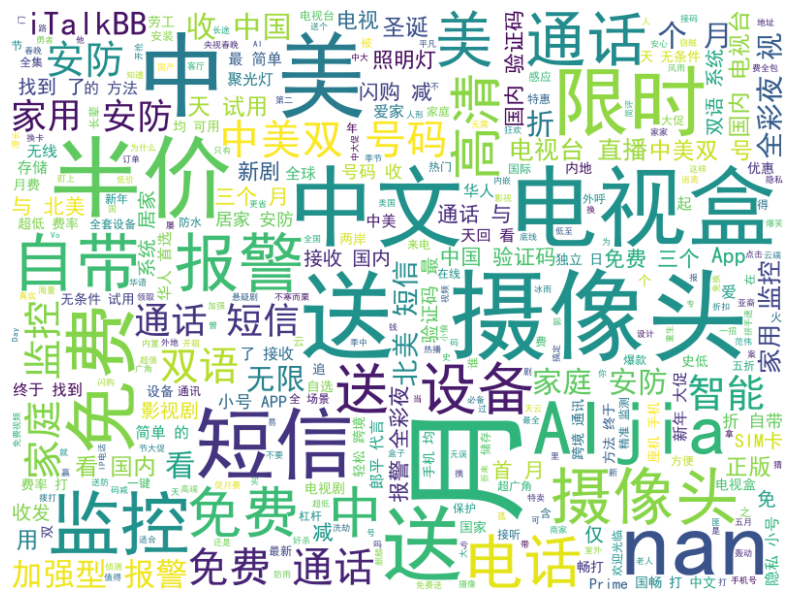

In [73]:
text = ' '.join(la['content'])

wc = WordCloud(background_color='white', max_words=2500, font_path='simhei.ttf', width = 800, height = 600)

wc.generate(text)

plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()